In [1]:
import pandas as pd
import numpy as np
pd.__version__
pd.set_option("display.max_columns",100)

In [13]:
titanic = pd.read_csv('https://drive.google.com/uc?id=1Fqw35EWPEolnyIGkgpXD5m6fLWuturuD')

In [ ]:
len(titanic)

891

In [52]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [53]:
titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=titanic)

In [6]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [14]:
titanic.drop(["PassengerId", "Name","Ticket"],axis = 1,inplace = True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [15]:
gender_pivot = pd.pivot_table(data = titanic,index = ["Sex"],aggfunc = np.sum)
gender_pivot

<ipython-input-15-0182845c1c71>:1: FutureWarning: The provided callable <function sum at 0x7cac68fb82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gender_pivot = pd.pivot_table(data = titanic,index = ["Sex"],aggfunc = np.sum)


,Age,Cabin,Embarked,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,,,
female,7286.00,C85C123G6C103B78D33B28F33C23 C25 C27E101F E69D...,CSSSCSSSSSCQSSQCQSCSSCQQSCSSSSSSSQSSSSSSQCSCSS...,13966.6628,204,678,218,233
male,13919.17,E46D56A6C23 C25 C27B30C52C83F G73E31A5D10 D12D...,SSQSSSSQSSSSCSSCSCSCSCSQCSSCSCSCSSCCSSSSCSSSSS...,14727.2865,136,1379,248,109


In [16]:
class_pivot = pd.pivot_table(data = titanic,index = ["Sex","Pclass"],aggfunc = np.sum)
class_pivot

<ipython-input-16-2e45fb7f0053>:1: FutureWarning: The provided callable <function sum at 0x7cac68fb82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  class_pivot = pd.pivot_table(data = titanic,index = ["Sex","Pclass"],aggfunc = np.sum)


Age                                              Cabin  \
Sex    Pclass                                                               
female 1       2942.00  C85C123C103B78D33B28C23 C25 C27D47C2E33C49B4B8...   
       2       2125.50                       F33E101E101DF33DF33F4E101E77   
       3       2218.50                                  G6F E69G6G6G6E121   
male   1       4169.42  E46A6C23 C25 C27B30C52C83E31A5D10 D12D26C110B5...   
       2       3043.33                                       D56F2F4F2DF2   
       3       6706.42                          F G73E10F G63F G73E121F38   

                                                        Embarked       Fare  \
Sex    Pclass                                                                 
female 1       CSSCCSSSSCCCCCSCSCSSSSCSCCCCCCSCCCSCSSCCCCSCQS...  9975.8250   
       2       CSSCSSSSSSSSSSSSSSSSQSSQSSSSSSCSSSSSSSSSSSSCSS...  1669.7292   
       3       SSSSSCQSSQQSCSQQSSSSQSSSQCSCSCSCSSSQSSSSQSQSQS...  2321.1086   
male   1       SSSCCSCSSCSSCCSSCSSCCSSCSSCSQSSSSSCSCSSSSSSSCC...  8201.5875   
       2       SSSSSSSSSSCSCSSSSSSCSSSSSSSSSSSSSSSSSSSCCSSSSS...  2132.1125   
       3       SSQSSSQCSCSCSQCSSCSCSCSSCSSSSSSSSSSSSSSSSSSSSS...  4393.5865   

               Parch  SibSp  Survived  
Sex    Pclass                          
female 1          43     52        91  
       2          46     37        70  
       3         115    129        72  
male   1          34     38        45  
       2          24     37        17  
       3          78    173        47

In [23]:
class_pivot = pd.pivot_table(data = titanic, index =["Age","SibSp","Survived"],aggfunc =np.sum)
class_pivot

<ipython-input-23-780b20b00824>:1: FutureWarning: The provided callable <function sum at 0x7cac68fb82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  class_pivot = pd.pivot_table(data = titanic, index =["Age","SibSp","Survived"],aggfunc =np.sum)


Cabin Embarked     Fare  Parch  Pclass           Sex
Age   SibSp Survived                                                     
0.42  0     1            0        C   8.5167      1       3          male
0.67  1     1            0        S  14.5000      1       2          male
0.75  2     1            0       CC  38.5166      2       6  femalefemale
0.83  0     1            0        S  29.0000      2       2          male
      1     1            0        S  18.7500      1       2          male
...                    ...      ...      ...    ...     ...           ...
70.00 1     0          B22        S  71.0000      1       1          male
70.50 0     0            0        Q   7.7500      0       3          male
71.00 0     0           A5       CC  84.1584      0       2      malemale
74.00 0     0            0        S   7.7750      0       3          male
80.00 0     1          A23        S  30.0000      0       1          male

[256 rows x 6 columns]

In [54]:
#their is error in sex  column so replacing as needed
titanic["Sex"]=titanic["Sex"].replace("malemale","male")
titanic["Sex"]=titanic["Sex"].replace("femalemale","female")
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [24]:
class_pivot = pd.pivot_table(data = titanic,index = ["Sex","Survived"],aggfunc = np.sum)
class_pivot

<ipython-input-24-ebd9f58a6f90>:1: FutureWarning: The provided callable <function sum at 0x7cac68fb82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  class_pivot = pd.pivot_table(data = titanic,index = ["Sex","Survived"],aggfunc = np.sum)


Age                                              Cabin  \
Sex    Survived                                                                
female 0          1603.00                           C49G6G6C22 C26C22 C26E77   
       1          5683.00  C85C123G6C103B78D33B28F33C23 C25 C27E101F E69D...   
male   0         11382.50  E46C23 C25 C27B30C83F G73E31A5D26C110B58 B60D2...   
       1          2536.67  D56A6C52D10 D12F4F2A31C93D35C106C22 C26F2E50B9...   

                                                          Embarked  \
Sex    Survived                                                      
female 0         SSSSSSSSSCSCSSCSSCSSSSSCSSSQSSSSSCSSSSSSSSSSSS...   
       1         CSSSCSSSCQSQCQCCQQCSSSSSSQSSSSSQSCSSSSSQSSSSQS...   
male   0         SSQSSSSQSCSSCSCSSCSQCSSCCSCSSCSSSSCSSSSSSSSSSS...   
       1         SSSCSCSSSCSCSSSSSSSCCSSSSSSSSSSSQSSSSCSSSSSSSS...   

                       Fare  Parch  Pclass  SibSp  
Sex    Survived                                    
female 0          1864.9752     84     231     98  
       1         12101.6876    120     447    120  
male   0         10277.7447     97    1159    206  
       1          4449.5418     39     220     42

In [25]:
class_pivot = pd.pivot_table(data = titanic,index = ["Sex"],aggfunc = np.sum)
class_pivot

<ipython-input-25-01eee614991f>:1: FutureWarning: The provided callable <function sum at 0x7cac68fb82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  class_pivot = pd.pivot_table(data = titanic,index = ["Sex"],aggfunc = np.sum)


,Age,Cabin,Embarked,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,,,
female,7286.00,C85C123G6C103B78D33B28F33C23 C25 C27E101F E69D...,CSSSCSSSSSCQSSQCQSCSSCQQSCSSSSSSSQSSSSSSQCSCSS...,13966.6628,204,678,218,233
male,13919.17,E46D56A6C23 C25 C27B30C52C83F G73E31A5D10 D12D...,SSQSSSSQSSSSCSSCSCSCSCSQCSSCSCSCSSCCSSSSCSSSSS...,14727.2865,136,1379,248,109


In [26]:
class_pivot = pd.pivot_table(data = titanic,index = ["Sex","Pclass"],values = ["Age"],aggfunc = np.mean)
class_pivot

<ipython-input-26-869e5d47a1d8>:1: FutureWarning: The provided callable <function mean at 0x7cac68fb93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  class_pivot = pd.pivot_table(data = titanic,index = ["Sex","Pclass"],values = ["Age"],aggfunc = np.mean)


Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

In [27]:
class_pivot = pd.pivot_table(data = titanic,index = ["Sex"],values = ["Survived"],columns = ["Pclass"],aggfunc = np.sum)
class_pivot

<ipython-input-27-098d6ca4562a>:1: FutureWarning: The provided callable <function sum at 0x7cac68fb82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  class_pivot = pd.pivot_table(data = titanic,index = ["Sex"],values = ["Survived"],columns = ["Pclass"],aggfunc = np.sum)


Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

In [28]:
titanic.Cabin.nunique()

147

In [31]:
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


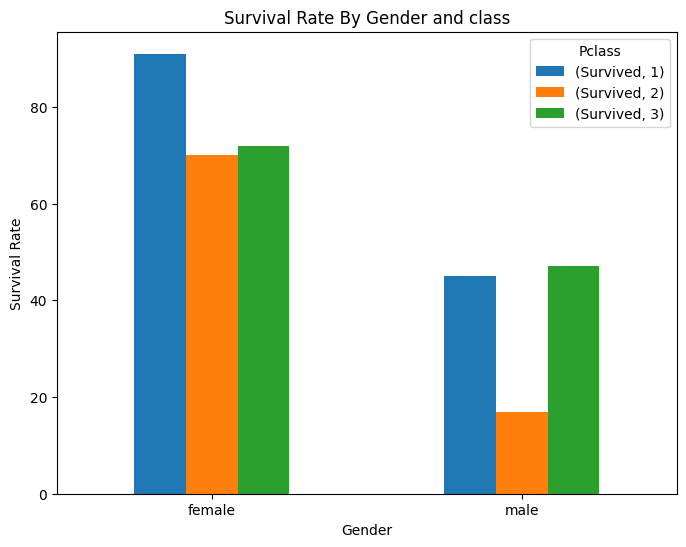

In [36]:
import matplotlib.pyplot as plt
class_pivot.plot(kind="bar", figsize=(8,6))
plt.title("Survival Rate By Gender and class")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.legend(title = "Pclass")
plt.show()

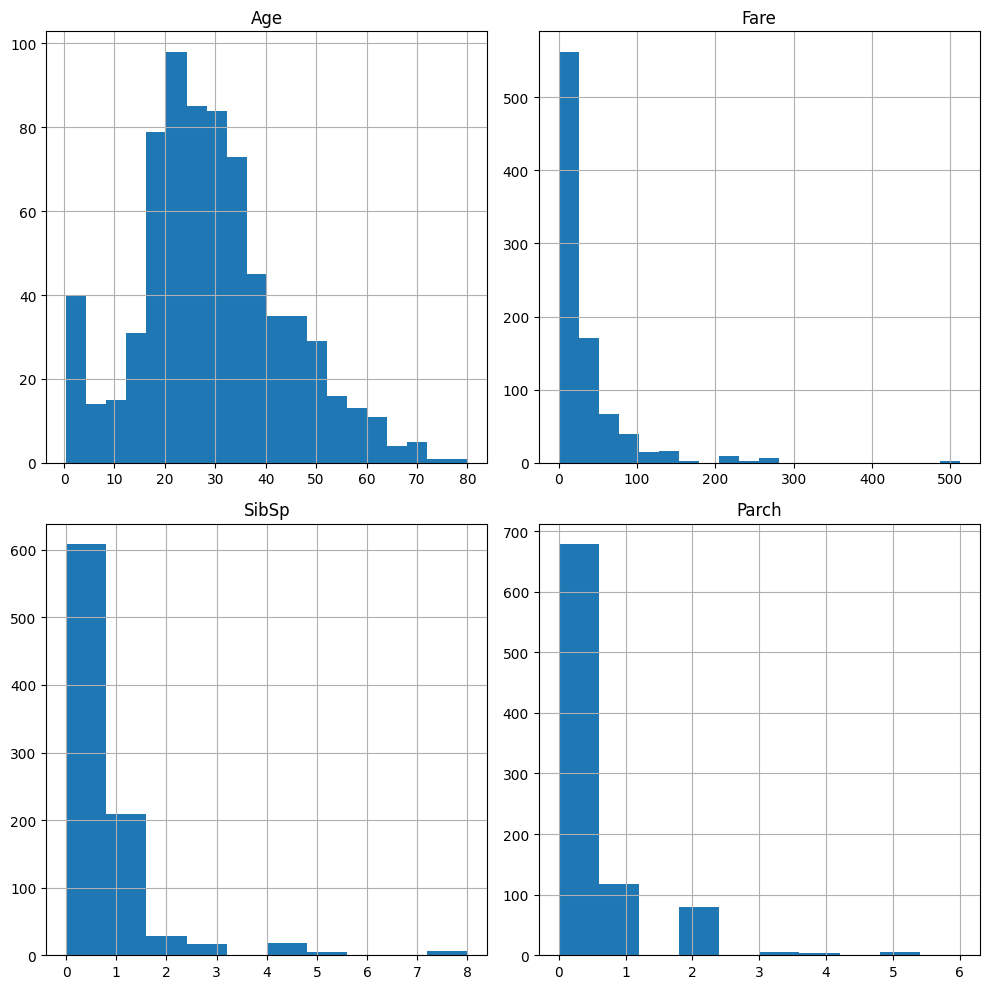

In [37]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
titanic.hist(column=["Age","Fare"], bins=20, ax=ax[0])# Histograms for 'Age' and 'Fare'
titanic.hist(column=["SibSp","Parch"], bins=10, ax=ax[1])
plt.tight_layout()
plt.show()

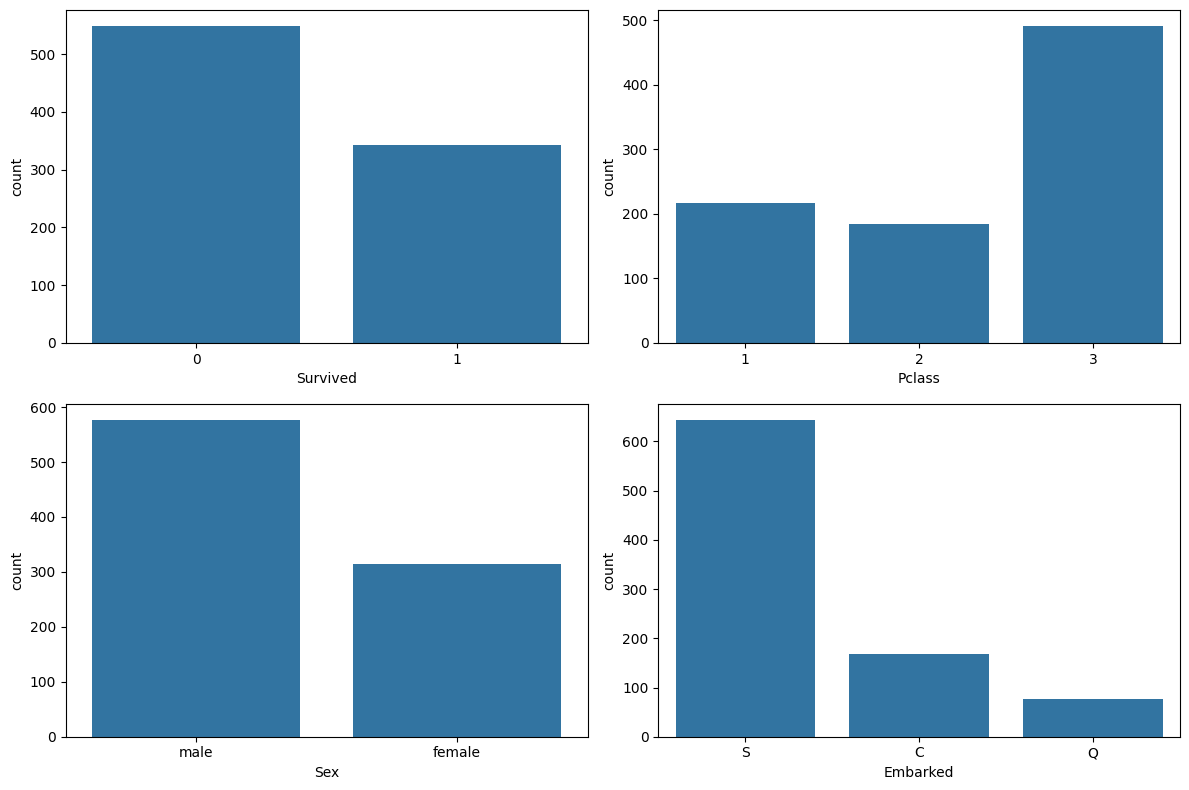

In [42]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='Survived', data=titanic, ax=axes[0, 0])  # Bar plot for 'Survived'
sns.countplot(x='Pclass', data=titanic, ax=axes[0, 1])  # Bar plot for 'Pclass'
sns.countplot(x='Sex', data=titanic, ax=axes[1, 0])  # Bar plot for 'Sex'
sns.countplot(x='Embarked', data=titanic, ax=axes[1, 1])  # Bar plot for 'Embarked'
plt.tight_layout()
plt.show()

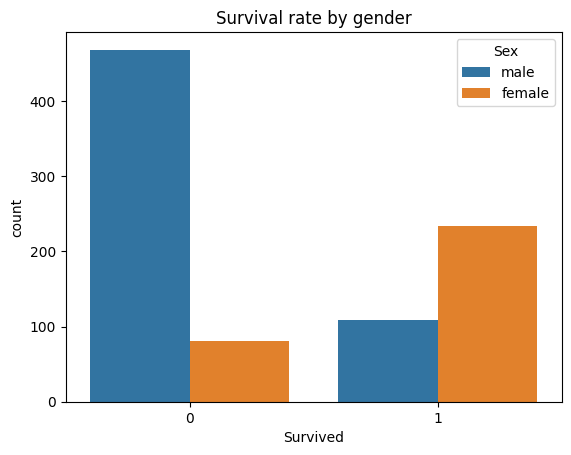

In [43]:
sns.countplot(x="Survived",hue="Sex", data=titanic)
plt.title("Survival rate by gender")
plt.show()

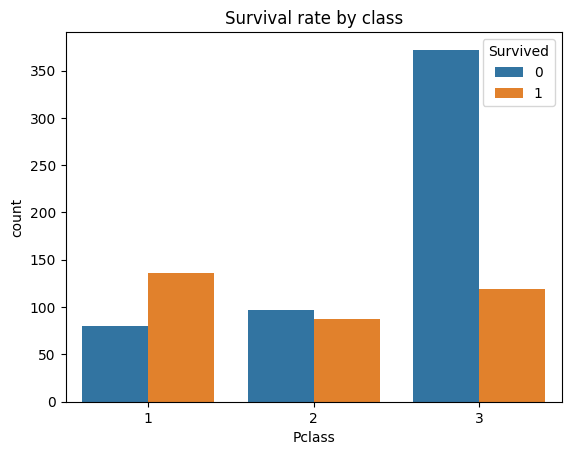

In [45]:
sns.countplot(x="Pclass",hue="Survived", data=titanic)
plt.title("Survival rate by class")
plt.show()

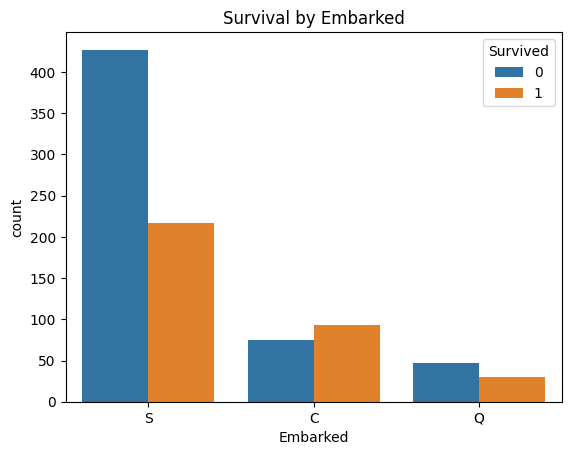

In [46]:
sns.countplot(x="Embarked", hue= "Survived", data=titanic)
plt.title("Survival by Embarked")
plt.show()

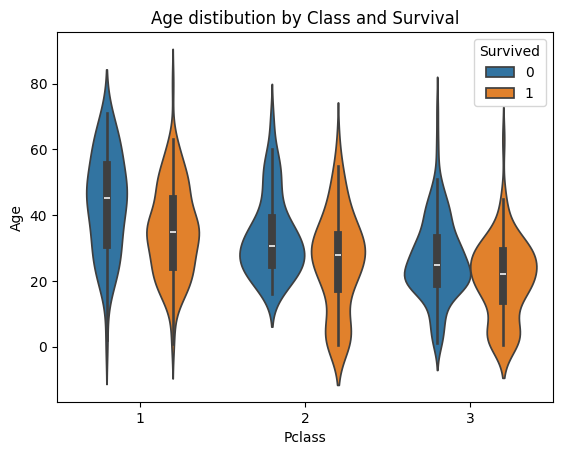

In [47]:
sns.violinplot(x="Pclass",y = "Age",hue="Survived", data=titanic)
plt.title("Age distibution by Class and Survival")
plt.show()

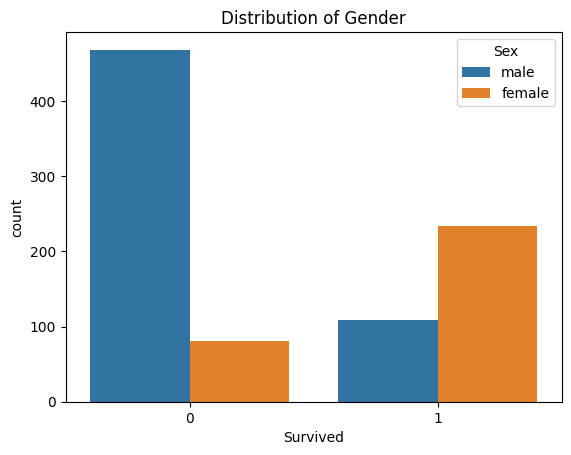

In [51]:
sns.countplot(x='Survived',hue="Sex", data=titanic)
plt.title('Distribution of Gender')
plt.show()

The Titanic dataset contains information about 891 passengers. Three embarked passengers boarded from three ports. The age for 177 passengers is missing. There are four categorical columns and eight numerical columns. I drop the columns for Passenger ID, Name, and Ticket.

Next, I have categorize and count survival rates by passenger class and gender. I Have create a graph to illustrate survival rates by class and gender. The countplots for survival indicate that a value of 0 represents deceased passengers, while a value of 1 represents survived passengers. I also analyze survival rates by class.

From our findings, we can conclude that the survival rate for women is greater than that for men. Additionally, the data suggests that the age group of 12 to 45 years had a higher survival rate.